In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import keras
from keras.models import  Sequential
from keras.layers import  Dense
import numpy as np
np.random.seed(13)

print('TenserFlow : ', tf.__version__)
print('Keras : ', keras.__version__)
print('Numpy : ',np.__version__)

/Users/seojiwon/Documents/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/seojiwon/Documents/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/Users/seojiwon/Documents/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/seojiwon/Documents/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


TenserFlow :  1.8.0
Keras :  2.2.2
Numpy :  1.14.3


Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 7s 1us/step


In [3]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [4]:
X_train = X_train /255
X_test = X_test / 255

In [5]:
import random
samples = random.choices(population=range(0,60000),k=16)
samples

[23517,
 54647,
 1740,
 47006,
 25977,
 59968,
 11248,
 1599,
 44752,
 58483,
 1727,
 11228,
 6975,
 33366,
 26236,
 48850]

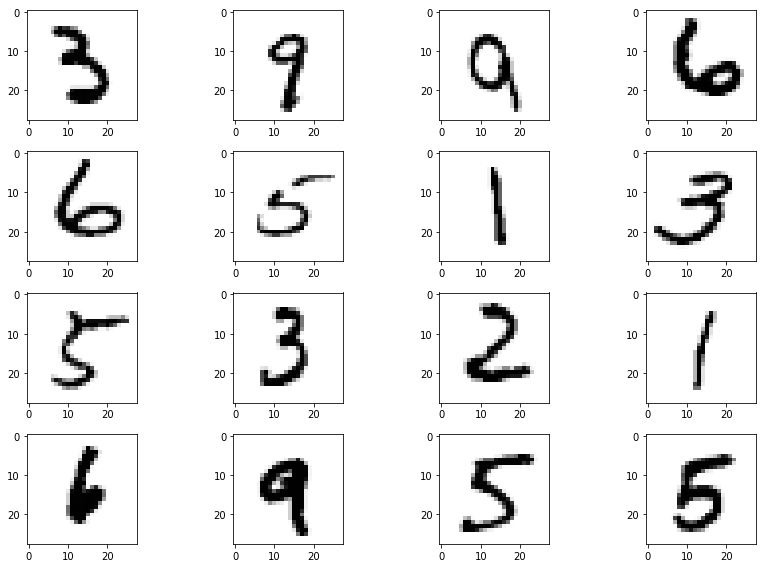

In [6]:
count = 0
nrows = ncols = 4
plt.figure(figsize=(12,8))

for n in samples:
    count+=1
    plt.subplot(nrows, ncols, count)
    plt.imshow(X_train[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    
    
plt.tight_layout()
plt.show()

In [8]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [10]:
model = Sequential()
model.add(Dense(1000, input_dim=num_pixels, activation='relu'))
model.add(Dense(num_classes,activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


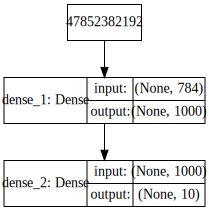

In [15]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot',format='svg'))

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
hist = model.fit(X_train, y_train,
                 validation_data = (X_test, y_test),
                 epochs=10, batch_size=200, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 147us/step - loss: 0.2665 - acc: 0.9241 - val_loss: 0.1325 - val_acc: 0.9612
Epoch 2/10
60000/60000 [==============================] - 9s 147us/step - loss: 0.1054 - acc: 0.9691 - val_loss: 0.0912 - val_acc: 0.9715
Epoch 3/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.0679 - acc: 0.9799 - val_loss: 0.0745 - val_acc: 0.9759
Epoch 4/10
60000/60000 [==============================] - 8s 140us/step - loss: 0.0486 - acc: 0.9859 - val_loss: 0.0686 - val_acc: 0.9785
Epoch 5/10
60000/60000 [==============================] - 9s 144us/step - loss: 0.0332 - acc: 0.9910 - val_loss: 0.0624 - val_acc: 0.9811
Epoch 6/10
60000/60000 [==============================] - 9s 142us/step - loss: 0.0238 - acc: 0.9940 - val_loss: 0.0626 - val_acc: 0.9794
Epoch 7/10
60000/60000 [==============================] - 9s 143us/step - loss: 0.0172 - acc: 0.9959 - val_loss: 0.0594 - 

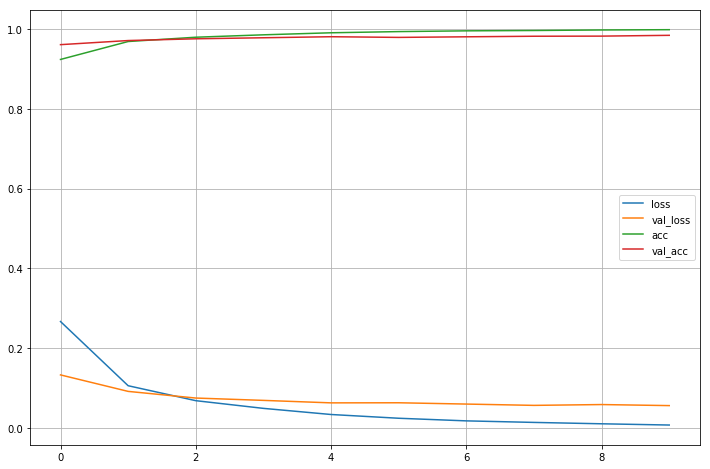

In [18]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['loss', 'val_loss', 'acc', 'val_acc'])
plt.grid()
plt.show()

In [19]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.055536432517970385
Test accuracy: 0.9846


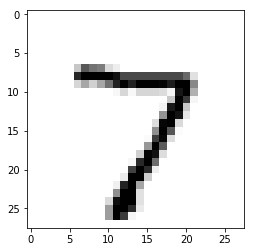

The Answer is  [7]


In [20]:
n = 0
plt.imshow(X_test[n].reshape(28,28),cmap='Greys', interpolation='nearest')
plt.show()

print('The Answer is ', model.predict_classes(X_test[n].reshape(1,784)))

In [21]:
predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels

array([7, 2, 1, ..., 4, 5, 6])

In [22]:
test_labels = np.argmax(y_test, axis=1)
test_labels


array([7, 2, 1, ..., 4, 5, 6])

In [23]:
wrong_result = []

for n in range(0, len(test_labels)):
    if predicted_labels[n] != test_labels[n]:
        wrong_result.append(n)
        
len(wrong_result)

154

In [24]:
import random
samples = random.choices(population=wrong_result, k=16)
samples

[9009,
 619,
 5936,
 6599,
 5936,
 1609,
 619,
 9015,
 9792,
 1232,
 1247,
 8519,
 447,
 684,
 2135,
 6576]

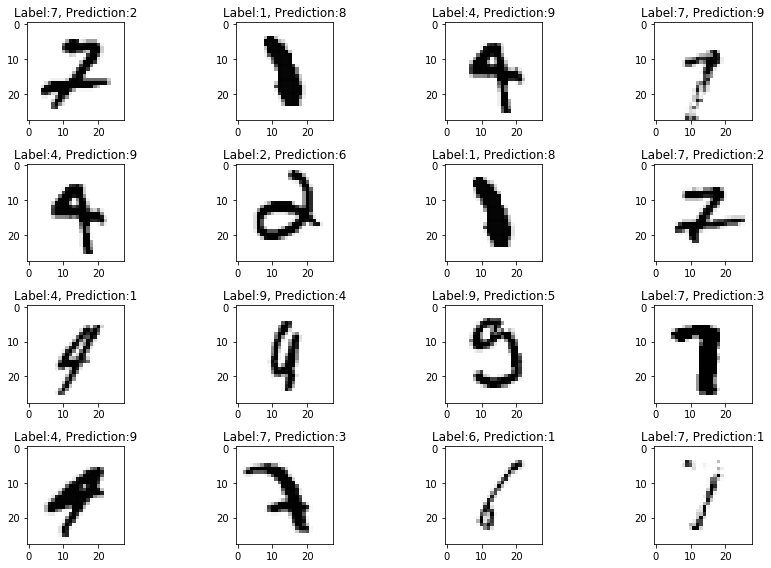

In [28]:
count=0
nrows = ncols = 4
plt.figure(figsize=(12,8))

for n in samples:
    count+= 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(X_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    tmp="Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)
    
plt.tight_layout()
plt.show()